In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,PolynomialFeatures
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from scipy.optimize import differential_evolution
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style='darkgrid')

# READ_DATA

In [354]:
df = pd.read_csv("adult.csv")
print("\n","Head Of data==>","\n")
display(df.head())
print("\n","Tail Of data==>","\n")
display(df.tail())


 Head Of data==> 



,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K



 Tail Of data==> 



,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [355]:
# Loop ผ่านแต่ละคอลัมน์และแสดง unique values
for column in df.columns:
    unique_values = df[column].unique()  # หา unique values ของคอลัมน์นั้นๆ
    print(f"Column '{column}' has {len(unique_values)} unique values:")
    print(unique_values)
    print("#" * 50)  # แยกแต่ละคอลัมน์ด้วยเครื่องหมาย # เพื่อความชัดเจน

Column 'age' has 74 unique values:
[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
##################################################
Column 'workclass' has 9 unique values:
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
##################################################
Column 'fnlwgt' has 28523 unique values:
[226802  89814 336951 ... 129912 255835 257302]
##################################################
Column 'education' has 16 unique values:
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
##################################################
Column 'educational-num' has 16 unique values:
[ 7  9 12 10  6 15  4 13 14 

พบว่าใน column =>    ["workclass",
                    "occupation",
                    "native-country"]   มี missing values

แสดงจำนวน unique values ของแต่ละคอลัมน์

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [357]:
unique_counts = df.nunique()

print(unique_counts)


age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64


พบว่าข้อมูลในส่วน Head Of data มี missing value => '?'

เปลี่ยน '?' เป็น 'Nan'

In [358]:
df.replace('?',np.nan,inplace=True)

Check Shape data & Info

In [359]:
print(df.shape)

(48842, 15)


Check NaN

In [360]:
df.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

NaN ทั้งหมดที่พบ

In [361]:
df.isna().sum().sum()

6465

เช็ครายละเอียดของข้อมูลในแต่ละ column ที่เป็นตัวเลข

In [362]:
display(df.describe())

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [363]:
# แยกคอลัมน์ที่เป็น Numeric และ Categorical
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print("Numeric columns:")
print(numeric_cols)

print("\nCategorical columns:")
print(categorical_cols)


Numeric columns:
Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

Categorical columns:
Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')


In [364]:
income_mapping = {'<=50K': 0, '>50K': 1}
df['income'] = df['income'].map(income_mapping)

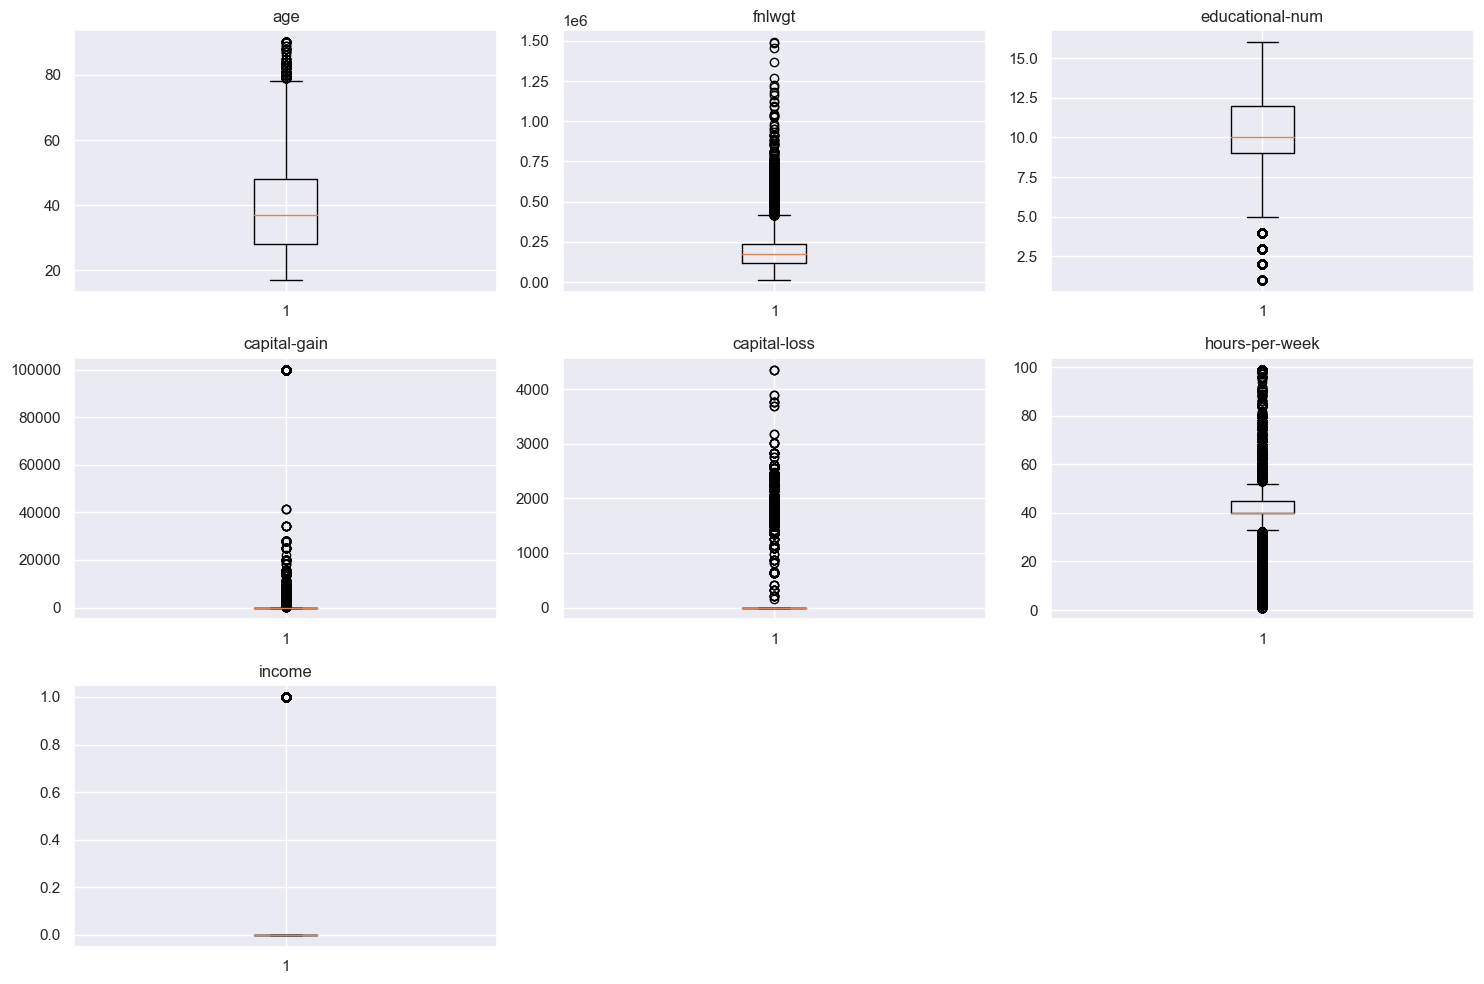

In [365]:
# เลือกเฉพาะคอลัมน์ที่เป็นตัวเลข
df_dump = df.copy()
numerical_cols = df_dump.select_dtypes(include=['number']).columns

# กำหนดขนาดของ Figure และจำนวน Subplot
plt.figure(figsize=(15, 10))
num_plots = len(numerical_cols)
subplot_rows = int(np.ceil(np.sqrt(num_plots)))
subplot_cols = int(np.ceil(num_plots / subplot_rows))

# สร้าง Subplot
for i, col in enumerate(numerical_cols):
    plt.subplot(subplot_rows, subplot_cols, i+1)
    plt.boxplot(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

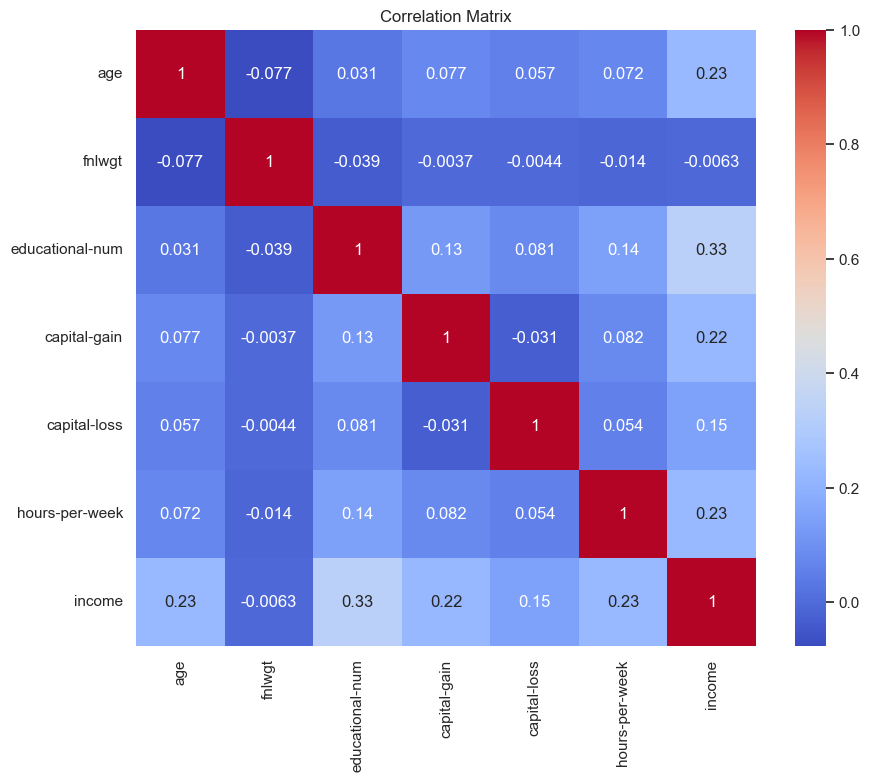

In [366]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# เลือกเฉพาะคอลัมน์ที่เป็นตัวเลข
df_show = df_dump.select_dtypes(include=['number'])

# คำนวณ Correlation Matrix
corr_matrix = df_show.corr()

# สร้าง Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

histogram

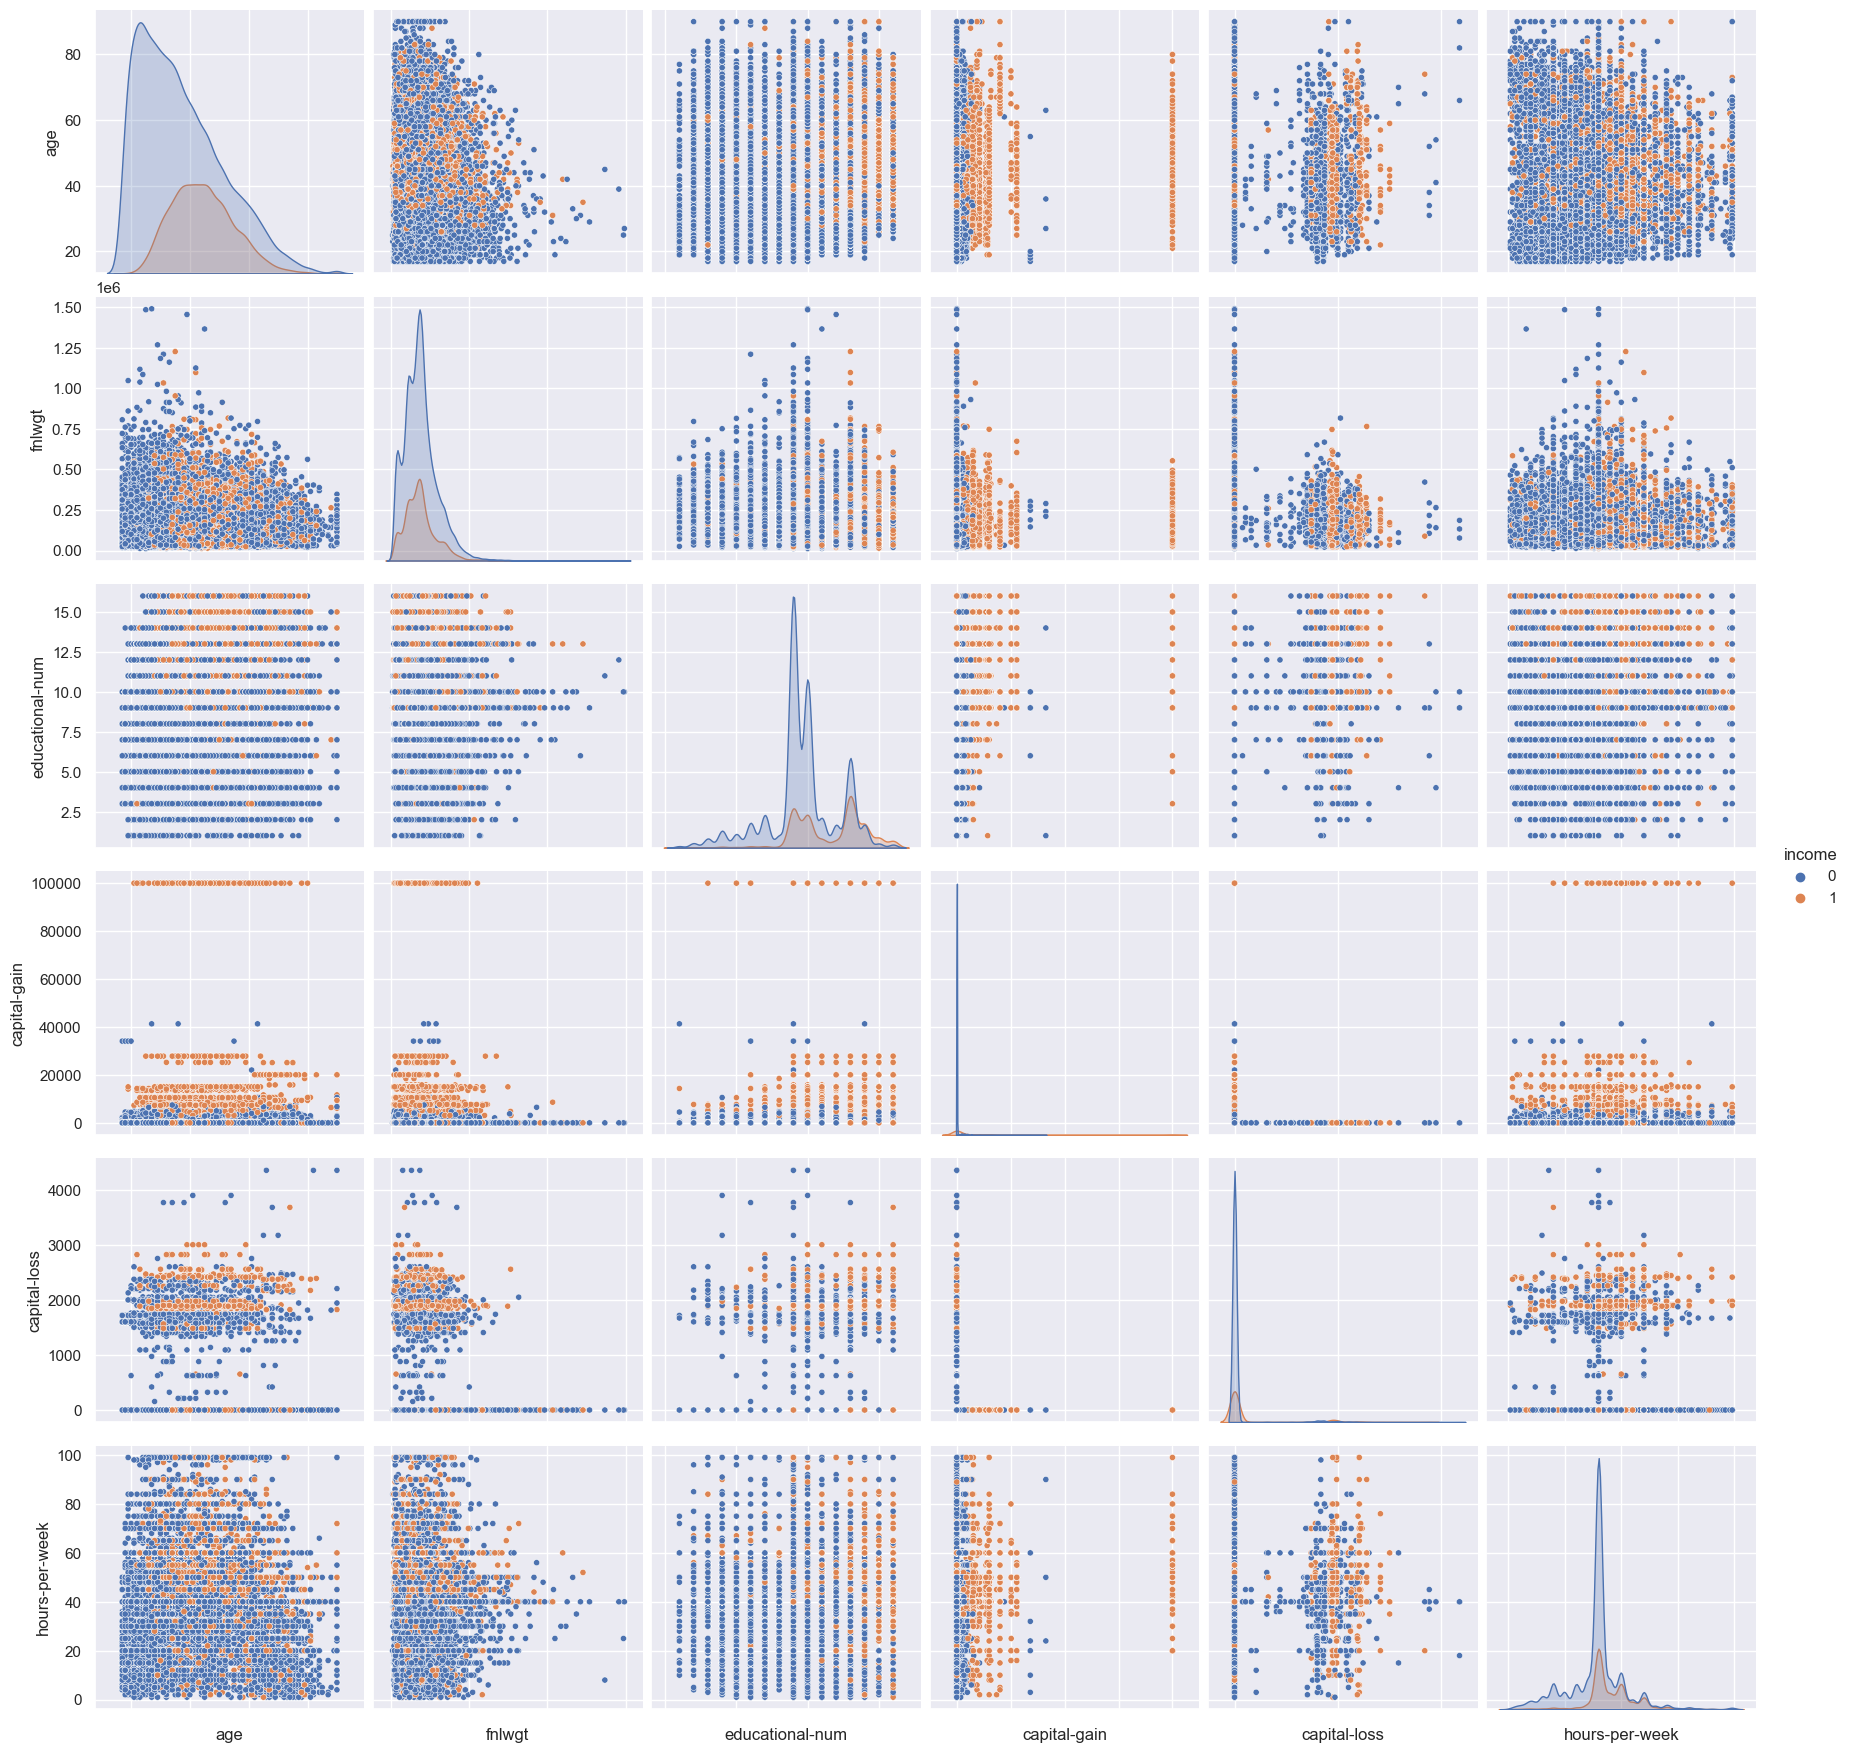

In [367]:
#pair plots of entire dataset
pp = sns.pairplot(df, hue = 'income', palette = 'deep', 
                  size=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
pp.set(xticklabels=[])

In [368]:
def categorial_analysis(col1:str,col2:str):
    freq_table_main = pd.crosstab(df[col1],
                                  df[col2],
                                  margins=True,
                                  margins_name="Count")
    freq_table=round((freq_table_main.div(freq_table_main["Count"],axis=0) * 100),2).iloc[:-1]
    display(freq_table)


In [369]:
categorial_analysis("income","occupation")

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Count
income,,,,,,,,,,,,,,,
0,13.99,0.03,13.66,9.18,3.81,5.59,7.66,13.63,0.69,9.79,1.95,11.64,2.96,5.41,100.0
1,6.72,0.04,12.11,25.46,1.51,1.21,3.26,1.79,0.03,24.37,2.70,12.91,3.68,4.21,100.0


In [370]:
categorial_analysis("income","marital-status")

marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Count
income,,,,,,,,
0,16.05,0.06,33.36,1.53,41.40,3.85,3.74,100.0
1,5.74,0.12,85.43,0.50,6.27,0.85,1.10,100.0


In [371]:
categorial_analysis("income","educational-num")

educational-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,Count
income,,,,,,,,,,,,,,,,,
0,0.22,0.64,1.30,2.40,1.92,3.50,4.63,1.64,35.74,23.72,4.14,3.20,12.68,3.22,0.58,0.44,100.0
1,0.01,0.07,0.23,0.53,0.35,0.74,0.79,0.41,21.42,17.65,4.47,3.53,28.35,12.48,5.28,3.69,100.0


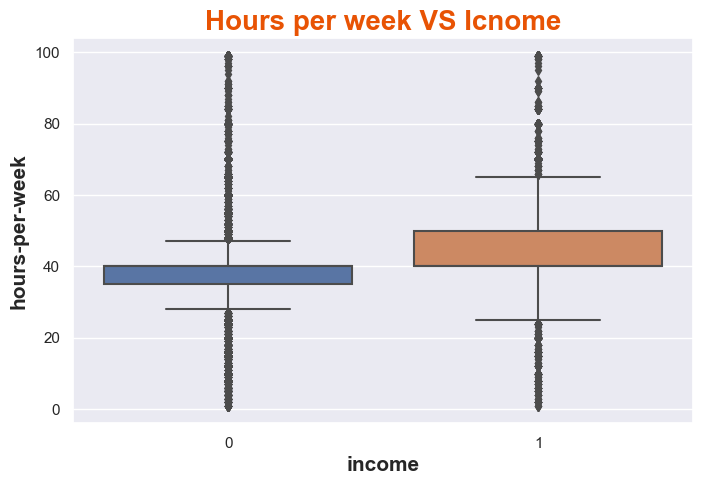

In [372]:
plt.figure(figsize=(8,5))
plt.title("Hours per week VS Icnome",weight='bold',fontsize=20,color='#e85304')
plt.xlabel("Income",weight='bold',fontsize=15)
plt.ylabel("Hours Per Week",weight='bold',fontsize=15)
sns.boxplot(data=df,x="income",y="hours-per-week")
plt.show()

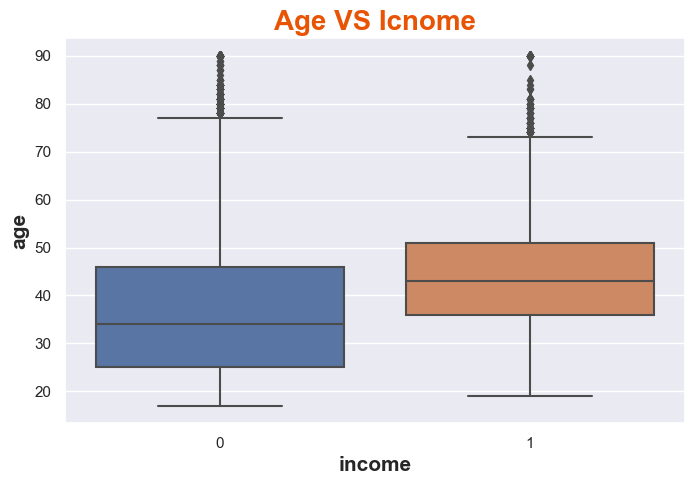

In [373]:
plt.figure(figsize=(8,5))
plt.title("Age VS Icnome",weight='bold',fontsize=20,color='#e85304')
plt.xlabel("Income",weight='bold',fontsize=15)
plt.ylabel("Age",weight='bold',fontsize=15)
sns.boxplot(data=df,x="income",y="age")
plt.show()

In [374]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [375]:
df2=df.copy()
le=LabelEncoder()
for i in df2.select_dtypes(include="object"):
    df2[i]=le.fit_transform(df2[i])

Duplicates

In [376]:
num_of_duplicates = df.duplicated().sum()
if num_of_duplicates>0:
    df.drop_duplicates(inplace=True,ignore_index=True,keep="first")
    print(f"The number of duplicates rows was {num_of_duplicates} and now 0")
else :
    print("There is no duplicates")

The number of duplicates rows was 52 and now 0


NaN Values

In [377]:
df_cleaned = df.dropna()
df_cleaned

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48785,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48786,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48787,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48788,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [378]:
df_cleaned["capital_val"]=df_cleaned["capital-gain"]-df_cleaned['capital-loss']
df_cleaned["capital"]=df_cleaned["capital_val"]
df_cleaned.loc[df_cleaned["capital_val"]>0,"capital"]="gain"
df_cleaned.loc[df_cleaned["capital_val"]<0,"capital"]="loss"
df_cleaned.loc[df_cleaned["capital_val"]==0,"capital"]="neither"
income_col=df_cleaned["income"]
df_cleaned.drop(["capital-gain","capital-loss","capital_val","income"],axis=1,inplace=True)
df_cleaned["income"]=income_col
df_cleaned.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,capital,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,neither,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,neither,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,neither,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,gain,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,neither,0


In [379]:
def categorial_analysis(col1:str,col2:str):
    freq_table_main = pd.crosstab(df_cleaned[col1],
                                  df_cleaned[col2],
                                  margins=True,
                                  margins_name="Count")
    freq_table=round((freq_table_main.div(freq_table_main["Count"],axis=0) * 100),2).iloc[:-1]
    display(freq_table)

In [380]:
categorial_analysis("income","capital")

capital,gain,loss,neither,Count
income,,,,
0,4.17,3.07,92.77,100.0
1,21.20,9.80,69.00,100.0


In [381]:
def convert_marital_status(status):
    if status in ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']:
        return 'married'
    elif status in ['Never-married', 'Separated', 'Widowed', 'Divorced']:
        return 'single'

In [382]:
df_test=df_cleaned.copy()
df_test['marital-status'] = df_test['marital-status'].apply(convert_marital_status)
df_test

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,capital,income
0,25,Private,226802,11th,7,single,Machine-op-inspct,Own-child,Black,Male,40,United-States,neither,0
1,38,Private,89814,HS-grad,9,married,Farming-fishing,Husband,White,Male,50,United-States,neither,0
2,28,Local-gov,336951,Assoc-acdm,12,married,Protective-serv,Husband,White,Male,40,United-States,neither,1
3,44,Private,160323,Some-college,10,married,Machine-op-inspct,Husband,Black,Male,40,United-States,gain,1
5,34,Private,198693,10th,6,single,Other-service,Not-in-family,White,Male,30,United-States,neither,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48785,27,Private,257302,Assoc-acdm,12,married,Tech-support,Wife,White,Female,38,United-States,neither,0
48786,40,Private,154374,HS-grad,9,married,Machine-op-inspct,Husband,White,Male,40,United-States,neither,1
48787,58,Private,151910,HS-grad,9,single,Adm-clerical,Unmarried,White,Female,40,United-States,neither,0
48788,22,Private,201490,HS-grad,9,single,Adm-clerical,Own-child,White,Male,20,United-States,neither,0


In [383]:
def categorial_analysis(col1:str,col2:str):
    freq_table_main = pd.crosstab(df_test[col1],
                                  df_test[col2],
                                  margins=True,
                                  margins_name="Count")
    freq_table=round((freq_table_main.div(freq_table_main["Count"],axis=0) * 100),2).iloc[:-1]
    display(freq_table)

In [384]:
categorial_analysis("income","marital-status")

marital-status,married,single,Count
income,,,
0,35.32,64.68,100.0
1,85.93,14.07,100.0


In [385]:
# le=LabelEncoder()
# for i in df_test.select_dtypes(include="object"):
#     df_test[i]=le.fit_transform(df_test[i])

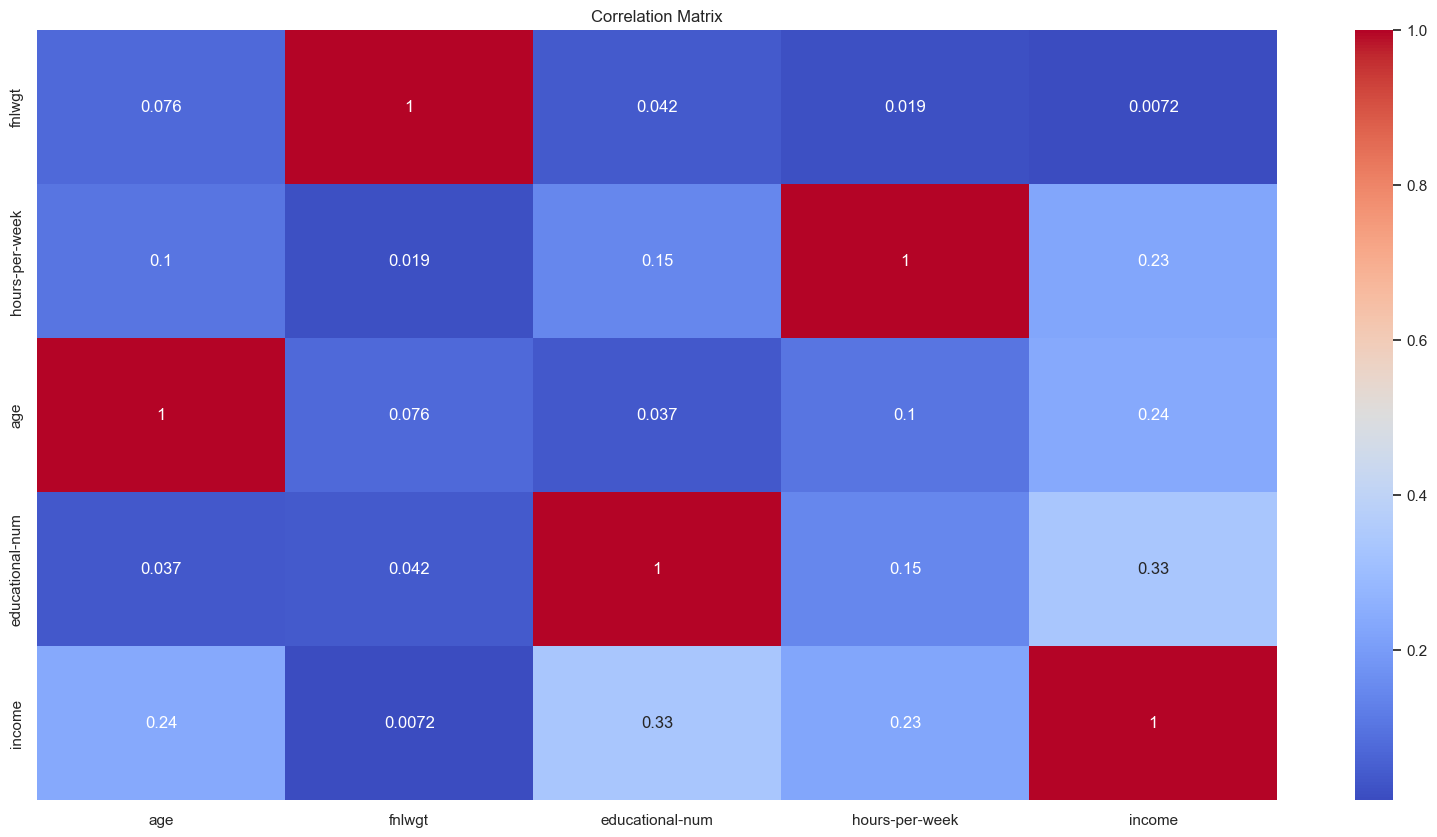

In [386]:
# เลือกเฉพาะคอลัมน์ที่เป็นตัวเลข
df_show = df_test.select_dtypes(include=['number'])

# คำนวณ Correlation Matrix
corr_matrix = df_show.corr()

# สร้าง Heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix.abs().sort_values("income"), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [387]:
# #pair plots of entire dataset
# pp = sns.pairplot(df_test, hue = 'income', palette = 'deep', 
#                   size=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
# pp.set(xticklabels=[])

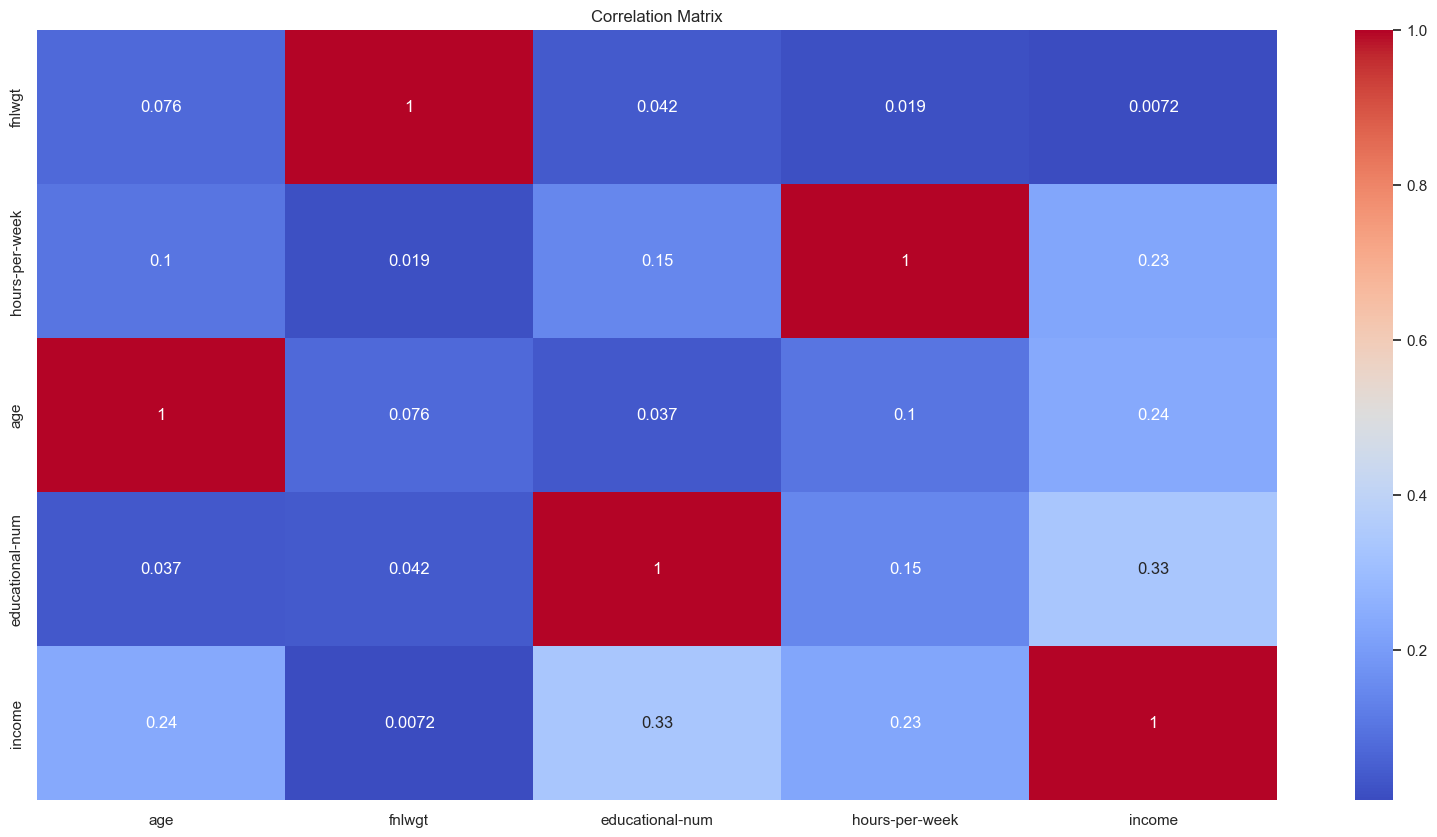

In [388]:
# เลือกเฉพาะคอลัมน์ที่เป็นตัวเลข
df_show = df_test.select_dtypes(include=['number'])

# คำนวณ Correlation Matrix
corr_matrix = df_show.corr()

# สร้าง Heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix.abs().sort_values("income"), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [389]:
df_test

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,capital,income
0,25,Private,226802,11th,7,single,Machine-op-inspct,Own-child,Black,Male,40,United-States,neither,0
1,38,Private,89814,HS-grad,9,married,Farming-fishing,Husband,White,Male,50,United-States,neither,0
2,28,Local-gov,336951,Assoc-acdm,12,married,Protective-serv,Husband,White,Male,40,United-States,neither,1
3,44,Private,160323,Some-college,10,married,Machine-op-inspct,Husband,Black,Male,40,United-States,gain,1
5,34,Private,198693,10th,6,single,Other-service,Not-in-family,White,Male,30,United-States,neither,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48785,27,Private,257302,Assoc-acdm,12,married,Tech-support,Wife,White,Female,38,United-States,neither,0
48786,40,Private,154374,HS-grad,9,married,Machine-op-inspct,Husband,White,Male,40,United-States,neither,1
48787,58,Private,151910,HS-grad,9,single,Adm-clerical,Unmarried,White,Female,40,United-States,neither,0
48788,22,Private,201490,HS-grad,9,single,Adm-clerical,Own-child,White,Male,20,United-States,neither,0


In [390]:
df_test.drop(["fnlwgt","native-country","occupation","workclass","race","education","relationship"],axis=1,inplace=True)

In [391]:
df_test

,age,educational-num,marital-status,gender,hours-per-week,capital,income
0,25,7,single,Male,40,neither,0
1,38,9,married,Male,50,neither,0
2,28,12,married,Male,40,neither,1
3,44,10,married,Male,40,gain,1
5,34,6,single,Male,30,neither,0
...,...,...,...,...,...,...,...
48785,27,12,married,Female,38,neither,0
48786,40,9,married,Male,40,neither,1
48787,58,9,single,Female,40,neither,0
48788,22,9,single,Male,20,neither,0


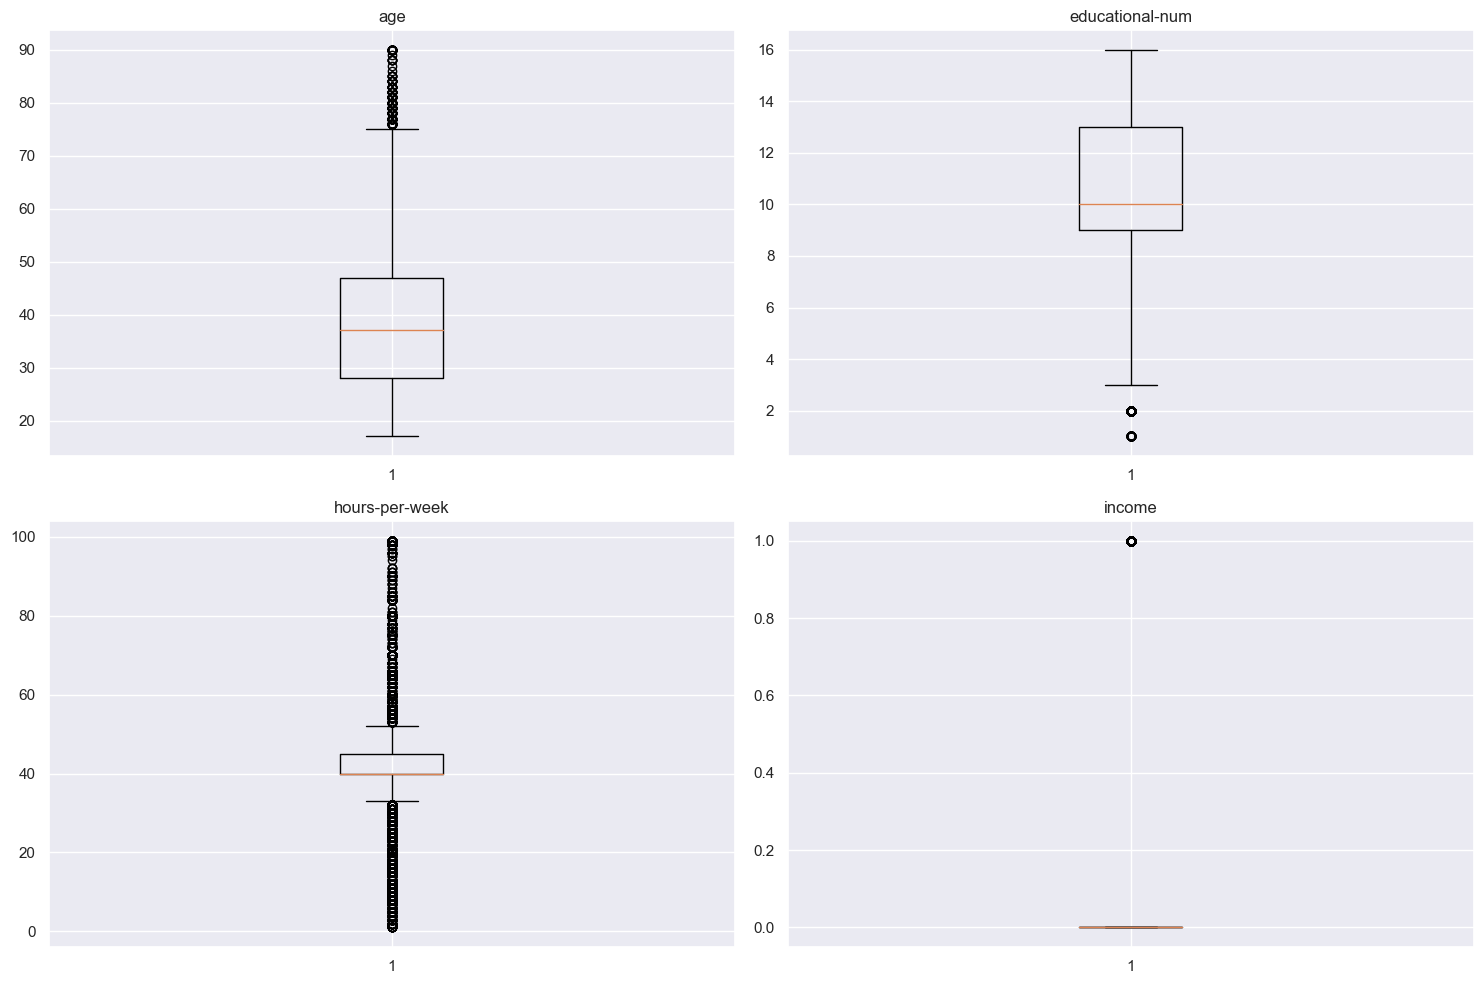

In [392]:
# เลือกเฉพาะคอลัมน์ที่เป็นตัวเลข
df_dump = df_test.copy()
numerical_cols = df_dump.select_dtypes(include=['number']).columns

# กำหนดขนาดของ Figure และจำนวน Subplot
plt.figure(figsize=(15, 10))
num_plots = len(numerical_cols)
subplot_rows = int(np.ceil(np.sqrt(num_plots)))
subplot_cols = int(np.ceil(num_plots / subplot_rows))

# สร้าง Subplot
for i, col in enumerate(numerical_cols):
    plt.subplot(subplot_rows, subplot_cols, i+1)
    plt.boxplot(df_dump[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [393]:
#Remove the Outliers
Q1 = df_dump['age'].quantile(0.25)
Q3 = df_dump['age'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_dump[(df_dump['age'] < Q1 - 1.5 * IQR) | (df_dump['age'] > Q3 + 1.5 * IQR)]

df_dump.drop(outliers.index, inplace=True)

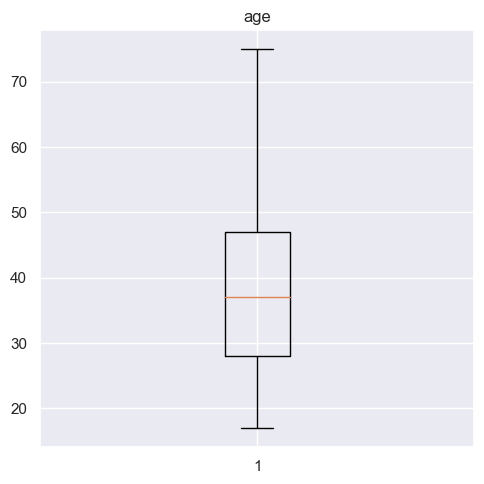

In [394]:
# เลือกเฉพาะคอลัมน์ 'age'
plt.figure(figsize=(5, 5))

# สร้าง boxplot สำหรับคอลัมน์ 'age'
plt.boxplot(df_dump['age'])
plt.title('age')

plt.tight_layout()
plt.show()

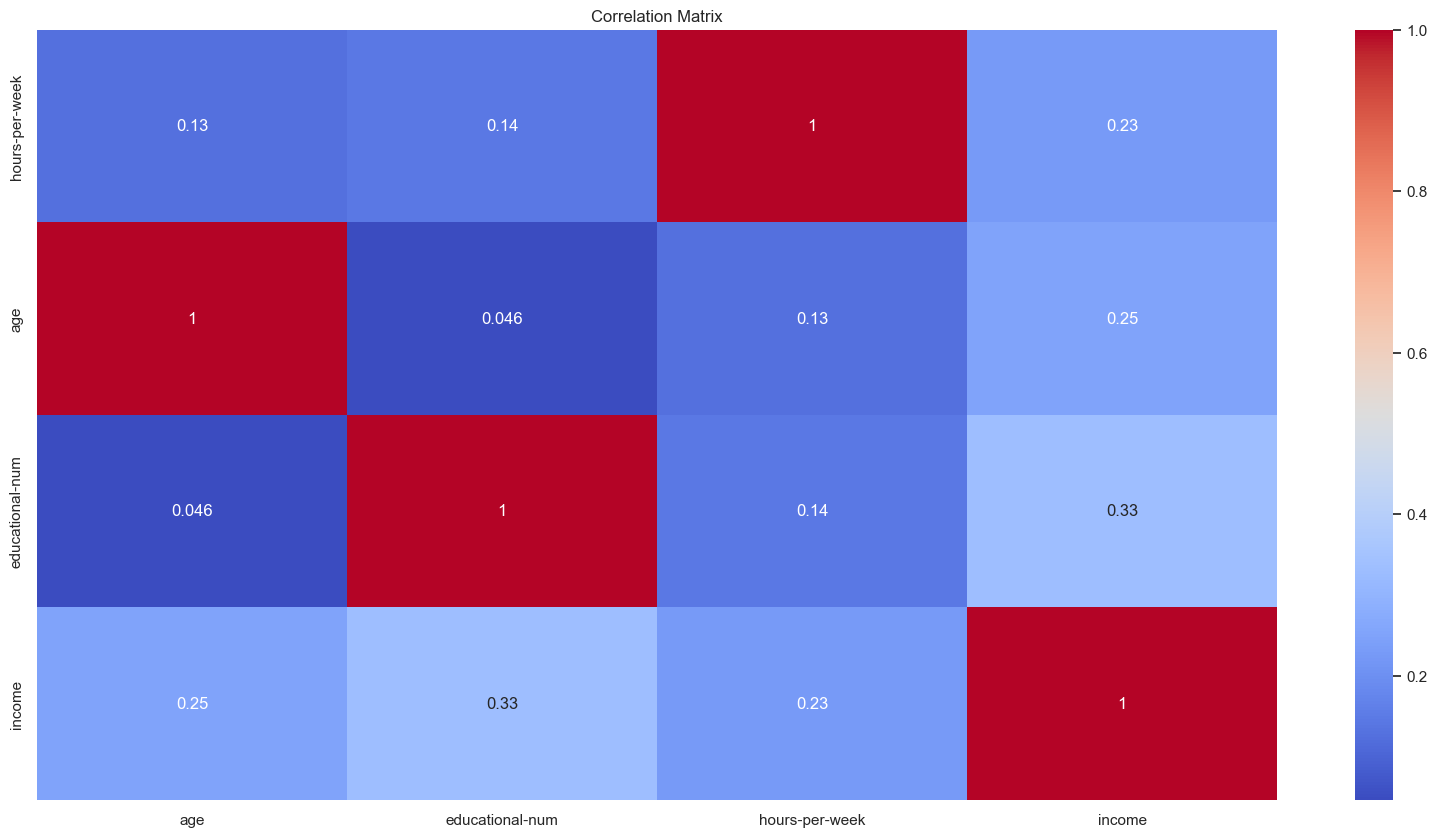

In [395]:
# เลือกเฉพาะคอลัมน์ที่เป็นตัวเลข
df_show = df_dump.select_dtypes(include=['number'])

# คำนวณ Correlation Matrix
corr_matrix = df_show.corr()

# สร้าง Heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix.abs().sort_values("income"), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [396]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# scaler = MinMaxScaler()


# # Standardization สำหรับคอลัมน์ "hours-per-week"
# df_dump['hours-per-week'] = scaler.fit_transform(df_dump[['hours-per-week']])

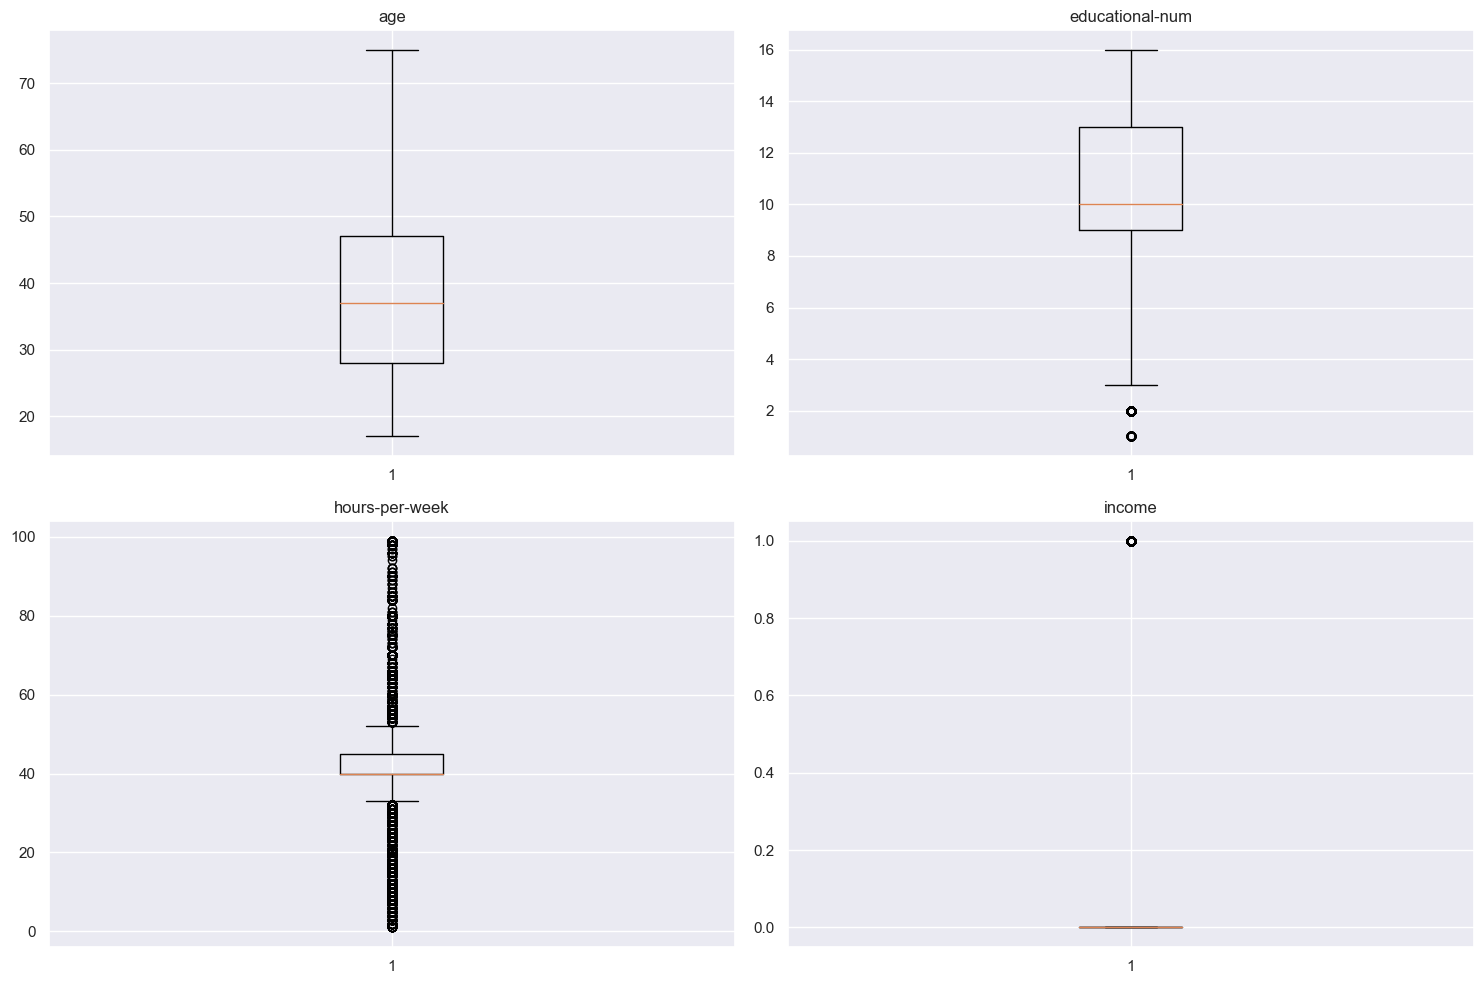

In [397]:
# เลือกเฉพาะคอลัมน์ที่เป็นตัวเลข
numerical_cols = df_dump.select_dtypes(include=['number']).columns

# กำหนดขนาดของ Figure และจำนวน Subplot
plt.figure(figsize=(15, 10))
num_plots = len(numerical_cols)
subplot_rows = int(np.ceil(np.sqrt(num_plots)))
subplot_cols = int(np.ceil(num_plots / subplot_rows))

# สร้าง Subplot
for i, col in enumerate(numerical_cols):
    plt.subplot(subplot_rows, subplot_cols, i+1)
    plt.boxplot(df_dump[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [398]:
df_dump

,age,educational-num,marital-status,gender,hours-per-week,capital,income
0,25,7,single,Male,40,neither,0
1,38,9,married,Male,50,neither,0
2,28,12,married,Male,40,neither,1
3,44,10,married,Male,40,gain,1
5,34,6,single,Male,30,neither,0
...,...,...,...,...,...,...,...
48785,27,12,married,Female,38,neither,0
48786,40,9,married,Male,40,neither,1
48787,58,9,single,Female,40,neither,0
48788,22,9,single,Male,20,neither,0


In [399]:
# Dummy encode the `department` column
df_dump = pd.get_dummies(df_dump, drop_first=False)

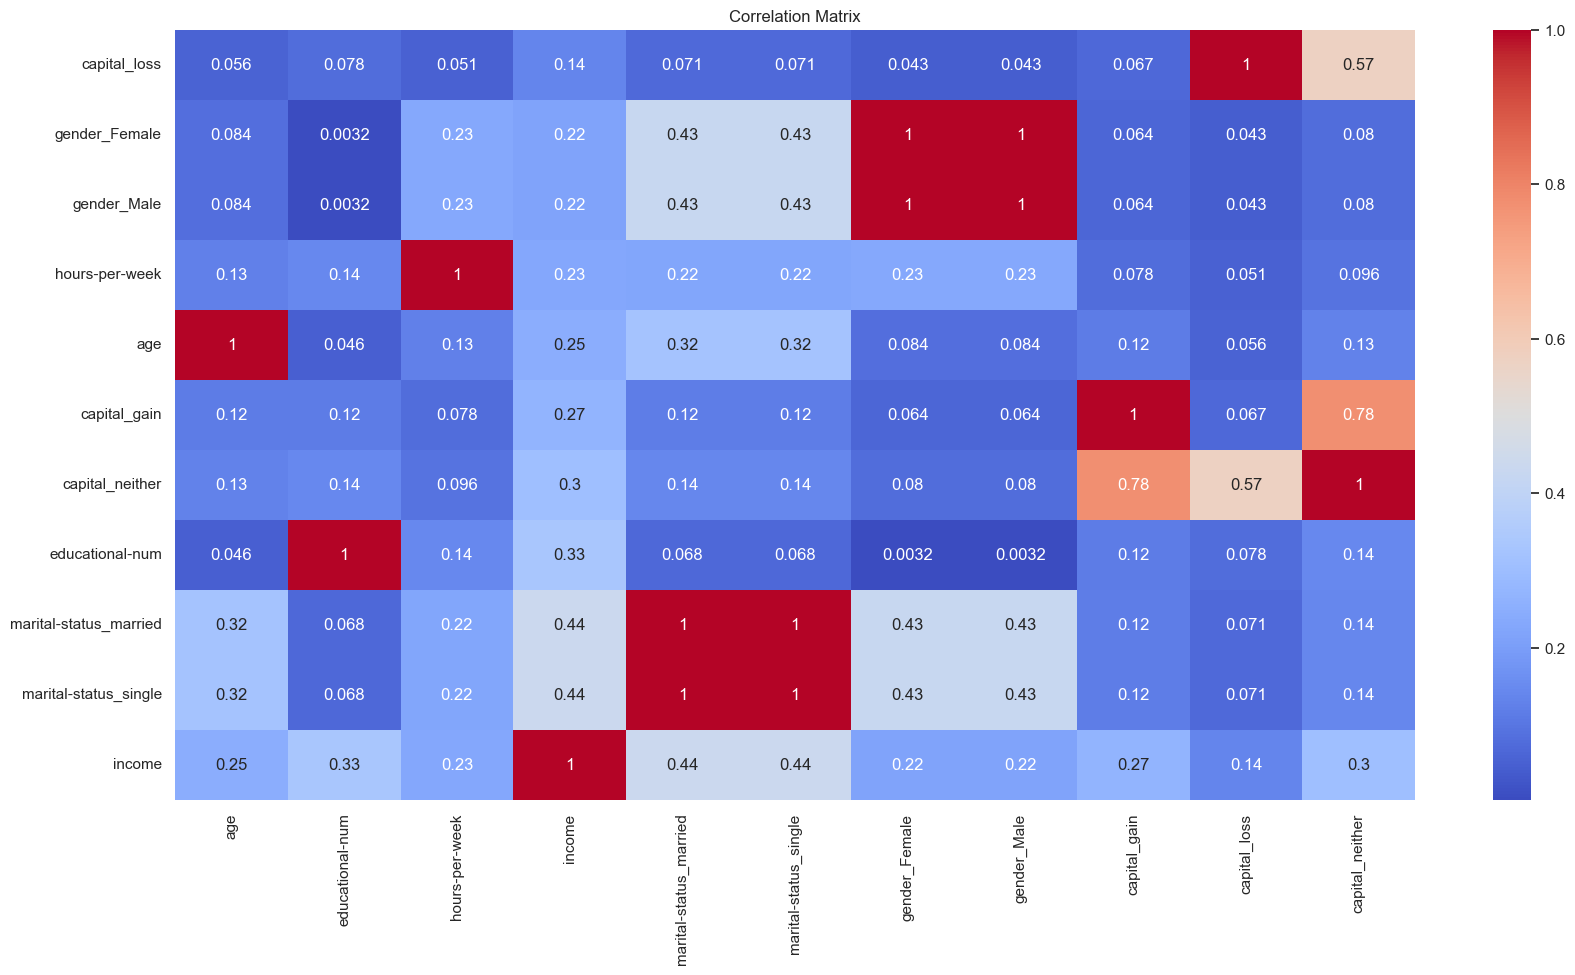

In [400]:
# เลือกเฉพาะคอลัมน์ที่เป็นตัวเลข
df_show = df_dump.select_dtypes(include=['number'])

# คำนวณ Correlation Matrix
corr_matrix = df_show.corr()

# สร้าง Heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix.abs().sort_values("income"), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [401]:
df_dump

,age,educational-num,hours-per-week,income,marital-status_married,marital-status_single,gender_Female,gender_Male,capital_gain,capital_loss,capital_neither
0,25,7,40,0,0,1,0,1,0,0,1
1,38,9,50,0,1,0,0,1,0,0,1
2,28,12,40,1,1,0,0,1,0,0,1
3,44,10,40,1,1,0,0,1,1,0,0
5,34,6,30,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
48785,27,12,38,0,1,0,1,0,0,0,1
48786,40,9,40,1,1,0,0,1,0,0,1
48787,58,9,40,0,0,1,1,0,0,0,1
48788,22,9,20,0,0,1,0,1,0,0,1


In [402]:
df_train = df_dump.copy()
X = df_train.drop('income', axis=1).copy()
y = df_train['income'].copy()

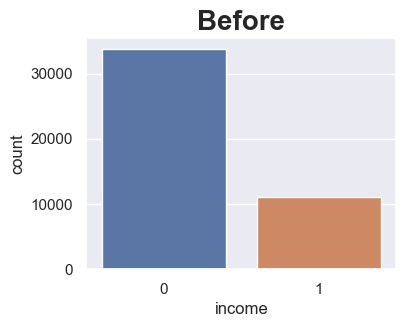

In [403]:
plt.figure(figsize=(4,3))
plt.title("Before",fontsize=20,weight="bold")
sns.countplot(x=y)
plt.show()

In [404]:
resampler = SMOTE()
X,y = resampler.fit_resample(X,y)

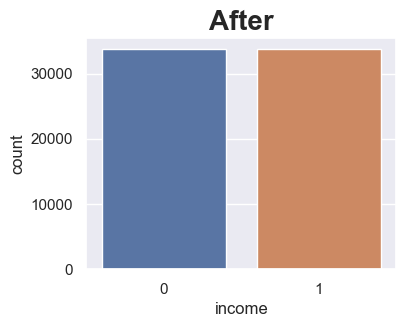

In [405]:
plt.figure(figsize=(4,3))
plt.title("After",fontsize=20,weight="bold")
sns.countplot(x=y)
plt.show()

In [406]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [407]:
clf = RandomForestClassifier(random_state=40)

In [408]:
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=40)

In [409]:
y_pred = clf.predict(x_test)

In [410]:
clf.score(x_test,y_test)

0.8408383943119537

In [411]:
from sklearn.model_selection import cross_val_score

# ทำ cross-validation โดยใช้ k-fold cross-validation
scores = cross_val_score(clf, X, y, cv=5)  # เปลี่ยน cv เป็นจำนวน fold ที่ต้องการ

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.84 (+/- 0.04)


In [412]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83      6746
           1       0.81      0.89      0.85      6756

    accuracy                           0.84     13502
   macro avg       0.84      0.84      0.84     13502
weighted avg       0.84      0.84      0.84     13502



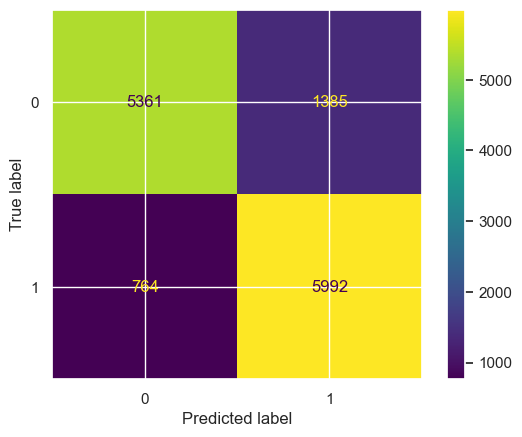

In [413]:
log_cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

In [414]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

In [415]:
model = LogisticRegression(max_iter = 1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

# save model

In [416]:
import pickle
# บันทึกโมเดลเป็นไฟล์ .pkl
with open('LogisticRegression_model.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [417]:
y_pred1 = model.predict(x_test1)

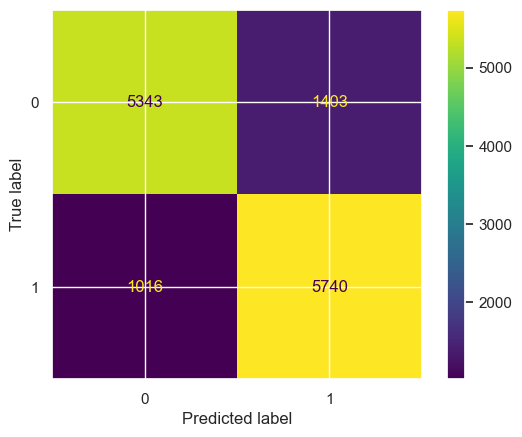

In [418]:
# Compute values for confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


log_cm = confusion_matrix(y_test1, y_pred1, labels=model.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=model.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

In [419]:
model.score(x_test1,y_test1)


0.8208413568360243

In [420]:
from sklearn.model_selection import cross_val_score

# ทำ cross-validation โดยใช้ k-fold cross-validation
scores = cross_val_score(model, X, y, cv=5)  # เปลี่ยน cv เป็นจำนวน fold ที่ต้องการ

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.82 (+/- 0.03)


In [421]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82      6746
           1       0.80      0.85      0.83      6756

    accuracy                           0.82     13502
   macro avg       0.82      0.82      0.82     13502
weighted avg       0.82      0.82      0.82     13502



In [425]:
from sklearn.naive_bayes import GaussianNB
# สมมติว่า X คือ features และ y คือ target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้างโมเดล Naive Bayes (GaussianNB เหมาะสำหรับข้อมูลแบบต่อเนื่อง)
model = GaussianNB()

# ฝึกสอนโมเดล
model.fit(X_train, y_train)

# ทำนายผลลัพธ์
y_pred = model.predict(X_test)

# ประเมินผลลัพธ์ (ตัวอย่างใช้ accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.7618871278329137
              precision    recall  f1-score   support

           0       0.81      0.68      0.74      6746
           1       0.73      0.84      0.78      6756

    accuracy                           0.76     13502
   macro avg       0.77      0.76      0.76     13502
weighted avg       0.77      0.76      0.76     13502



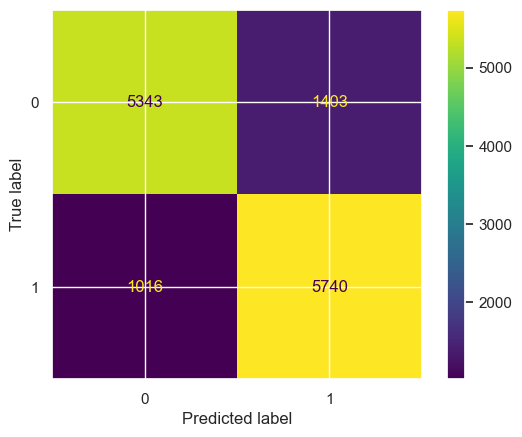

In [426]:
# Compute values for confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


log_cm = confusion_matrix(y_test1, y_pred1, labels=model.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=model.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

In [423]:
from sklearn.model_selection import cross_val_score

# ทำ cross-validation โดยใช้ k-fold cross-validation
scores = cross_val_score(model, X, y, cv=5)  # เปลี่ยน cv เป็นจำนวน fold ที่ต้องการ

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.76 (+/- 0.00)


# TeSt

In [424]:
import pickle

# โหลดโมเดลจากไฟล์
with open('LogisticRegression_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# ข้อมูลใหม่สำหรับทำนาย
new_data = [[27	,16	,49	,1	,0	,0	,1	,0	,0	,1]]
# ทำนายผลลัพธ์
result = loaded_model.predict(new_data)

# แสดงผลลัพธ์
print(result)

[1]
